In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
from sklearn.preprocessing import MinMaxScaler
    
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
airbnb = pd.read_csv("filtered_nyc_airbnb_2019.csv")
airbnb = airbnb.dropna()
airbnb.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [3]:
airbnb_dummies = pd.get_dummies(airbnb, columns = ["neighbourhood_group", "room_type"])
airbnb_dummies.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,...,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,...,6,365,0,1,0,0,0,0,1,0
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,...,2,355,0,0,1,0,0,1,0,0
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,...,1,194,0,1,0,0,0,1,0,0
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,...,1,0,0,0,1,0,0,1,0,0
5,5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Murray Hill,40.74767,-73.97500,200,3,...,1,129,0,0,1,0,0,1,0,0


In [4]:
airbnb_dummies2 = airbnb_dummies.drop(["Unnamed: 0", "id", "name", "host_id", "host_name", "neighbourhood","last_review"], axis = 1)

In [5]:
airbnb_dummies2.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,1,0,0,1,0,0
3,40.68514,-73.95976,89,1,270,4.64,1,194,0,1,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,1,0,0,1,0,0
5,40.74767,-73.97500,200,3,74,0.59,1,129,0,0,1,0,0,1,0,0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(airbnb_dummies2, airbnb_dummies2["price"], test_size = 0.2)

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[0.52792328, 0.54643133, 0.23      , ..., 1.        , 0.        ,
        0.        ],
       [0.67785565, 0.55497431, 0.21      , ..., 1.        , 0.        ,
        0.        ],
       [0.18588467, 0.53171631, 0.24      , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.53456289, 0.56982105, 0.45      , ..., 1.        , 0.        ,
        0.        ],
       [0.4685356 , 0.63368647, 0.134     , ..., 1.        , 0.        ,
        0.        ],
       [0.47313414, 0.62405209, 0.064     , ..., 0.        , 1.        ,
        0.        ]])

In [8]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled

array([[0.67337356, 0.63006253, 0.22      , ..., 1.        , 0.        ,
        0.        ],
       [0.62396809, 0.74336197, 0.12      , ..., 0.        , 1.        ,
        0.        ],
       [0.3074651 , 0.61817934, 0.068     , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.82598268, 0.56760758, 0.31      , ..., 1.        , 0.        ,
        0.        ],
       [0.7555477 , 0.54728927, 0.264     , ..., 1.        , 0.        ,
        0.        ],
       [0.57519376, 0.62219235, 0.258     , ..., 0.        , 1.        ,
        0.        ]])

In [9]:
k5nn = KNeighborsRegressor(n_neighbors = 5)
k5nn.fit(X_train_scaled, y_train)
y_pred = k5nn.predict(X_test_scaled)

In [10]:
mse = ((y_test - y_pred)**2).mean()
mse

116.03425379090169

In [11]:
import math 
rmse = math.sqrt(mse)
rmse

10.771919689215181

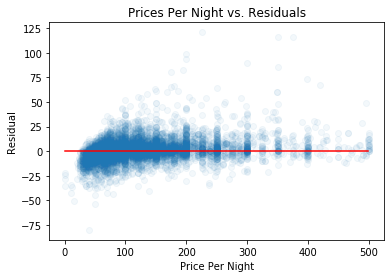

In [12]:
resid = y_test - y_pred
plt.scatter(y_test, resid, alpha = 0.05)
plt.xlabel("Price Per Night")
plt.ylabel("Residual")
plt.title("Prices Per Night vs. Residuals")
x = np.arange(0,500)
y = np.tile(0, len(x))
plt.plot(x,y, color = 'r')
plt.savefig("plots/k_nearest_residuals_plot.png")